# MNIST with Convolutional Neural Networks

## Prerequisites

Install the following packages

In [1]:
! pip3 install cloudmesh-installer
! pip3 install cloudmesh-common

     |████████████████████████████████| 81kB 3.3MB/s 
     |████████████████████████████████| 81kB 4.2MB/s 
     |████████████████████████████████| 870kB 6.2MB/s 
     |████████████████████████████████| 133kB 11.9MB/s 
     |████████████████████████████████| 71kB 6.0MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8210 sha256=122dc0bb00726d7f94b83ab4c455182e02cf6f78c8c878393f530e7bf1d4d59a
  Stored in directory: /root/.cache/pip/wheels/e1/c6/9b/651d8a21d59b51a75ab9c070838f9231b8126421bc0569af47
  Created wheel for python-hostlist: filename=python_hostlist-1.21-cp36-none-any.whl size=38931 sha256=7f5cdc41de29b7b3a31f9376b6523865dca048c2e246362dfc674a25bd3653b6
  Stored in directory: /root/.cache/pip/wheels/0b/5b/55/ddcf52288f0b10f4564ca1b2531594ff7ccc65f487ba8dc437
Successfully built ordered-set python-hostlist
ERROR: pytest-cov 2.11.1 has requirement coverage>=5.2.1, but you'll have coverag

## Import Libraries

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

## Download Data and Pre-Process

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

input_shape = (image_size, image_size, 1)
print(input_shape)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

11493376/11490434 [==============================] - 0s 0us/step
(28, 28, 1)


## Define Model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 64)         

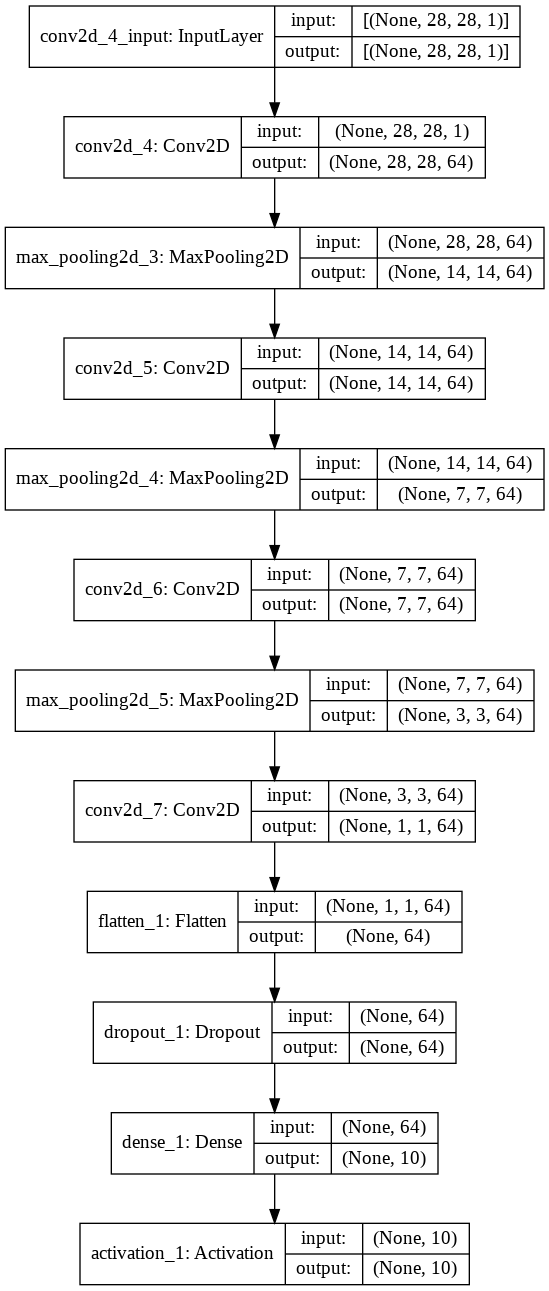

In [6]:
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape,
                 padding='same'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape,
                 padding='same'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

# Train

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

469/469 [==============================] - 125s 266ms/step - loss: 0.6794 - accuracy: 0.7783


## Test

In [8]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 6s 68ms/step - loss: 0.0608 - accuracy: 0.9813

Test accuracy: 98.1%
